---
## Proyecto Integrador 2

---

### Compañia automotriz.

Objetivos:
- Clasificar los autos en caros/baratos, utilizando como punto de corte la mediana de los percios
- Estimar el precio de un auto en función de sus características

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


---
### Cagamos los datos

---

In [46]:
df = pd.read_csv("ML_cars.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


---
### Exploración de los datos

#### Cuantas filas y columnas tiene el DataFrame?
---


In [47]:
# Cuantas filas (datos) y columnas (features) tiene nuestro dataset
n_rows, n_cols = df.shape
print("Nro. filas --> ", n_rows)
print("Nro. columnas --> ", n_cols)

Nro. filas -->  205
Nro. columnas -->  26


---
#### Hay datos faltantes?? 
RTA: Luego de analizar los datos, nos damos cuenta de que no hay missing data

---

In [48]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

---
### Vamos a calcular la mediana de los precios y crear una columna nueva para ver si el auto es caro o barato

cheap = 0
expensive = 1

---

In [49]:
cheap_exp_dict = {
    1: "expensive",
    0: "cheap"
}

median_price = df["price"].median()

df["expensive"] = df["price"].map(lambda x: 1 if x>=median_price else 0)

print("Mediana de los precios --> ", median_price)
print(df[["price","expensive"]].head())

Mediana de los precios -->  10295.0
     price  expensive
0  13495.0          1
1  16500.0          1
2  16500.0          1
3  13950.0          1
4  17450.0          1


---
### Vamos a ver cuantos datos "caros" hay vs cuantos "baratos"

Perfecto!!! El dataset esta balanceado!!!!

---

In [53]:
mask = df["expensive"]==1  # mascara para autos caros
n_expensive = int(df.loc[mask, ["expensive"]].count())
n_cheap =  int(df.loc[~mask, ["expensive"]].count())

print("Cantidad de autos caros --> ", n_expensive)
print("Cantidad de autos baratos --> ", n_cheap)

Cantidad de autos caros -->  103
Cantidad de autos baratos -->  102


---
### Hay datos categoricos??

---

In [9]:
cat_col =  df.select_dtypes(include=['object','category']).columns.tolist()

cat_col

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [16]:
# Vamos a hacer un diccionario con las opciones de cada uno de los datos categoricos
cat_dict = {}
for c in cat_col:
    cat_dict[c] = df[c].unique().tolist()

# Los nombres los dejo aparte, son demasiados y ensucian el diccionario
car_names = cat_dict.pop("CarName")

# Los valores unicos de las columnas categoricas son
for k,v in cat_dict.items():
    print(k,": ",v)
# car_names

fueltype :  ['gas', 'diesel']
aspiration :  ['std', 'turbo']
doornumber :  ['two', 'four']
carbody :  ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drivewheel :  ['rwd', 'fwd', '4wd']
enginelocation :  ['front', 'rear']
enginetype :  ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
cylindernumber :  ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
fuelsystem :  ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']


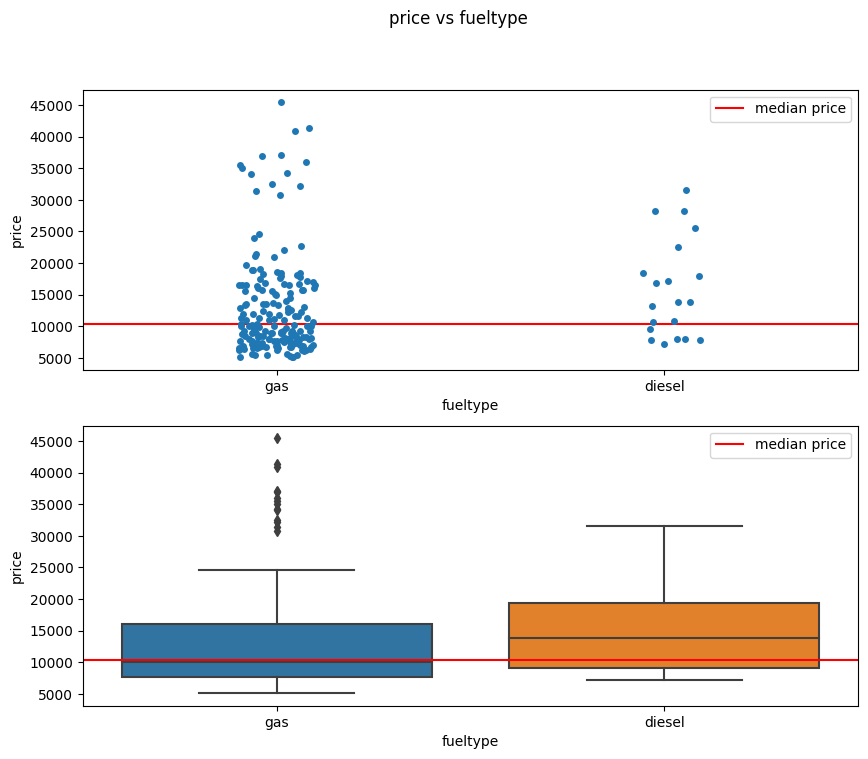

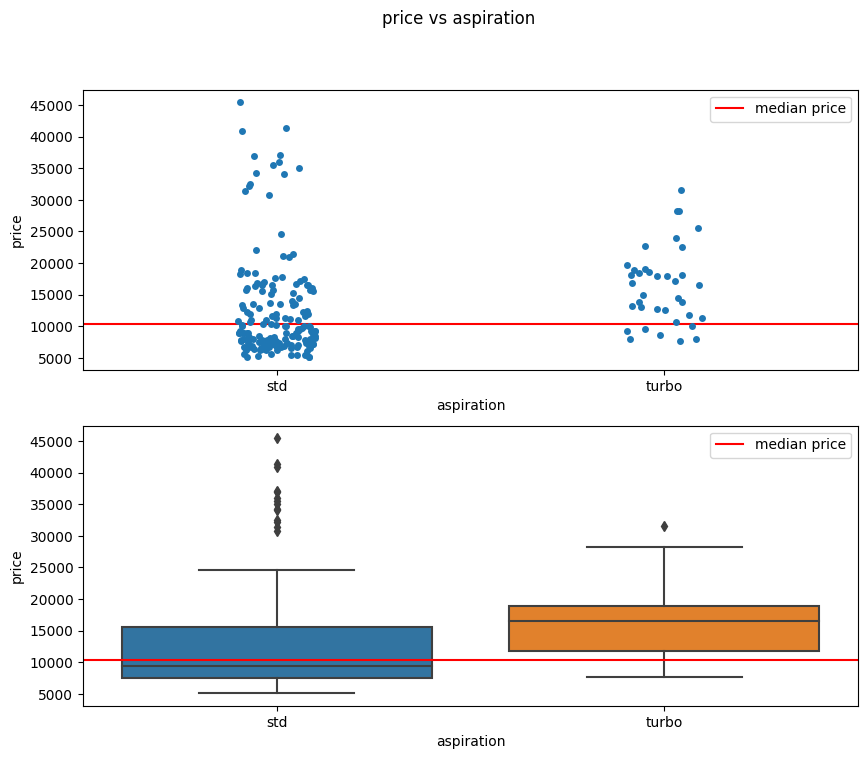

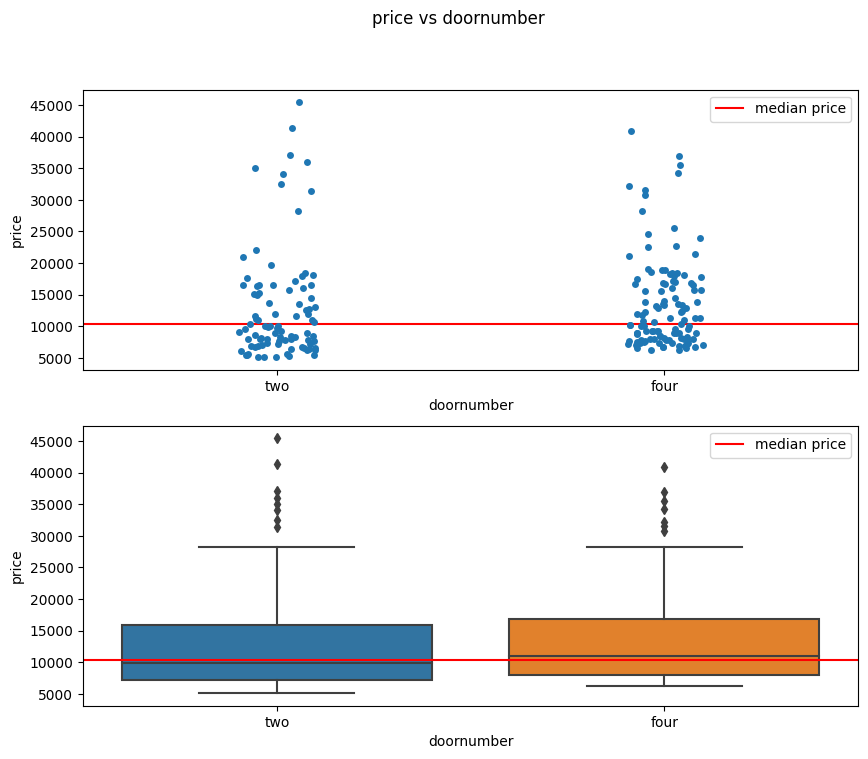

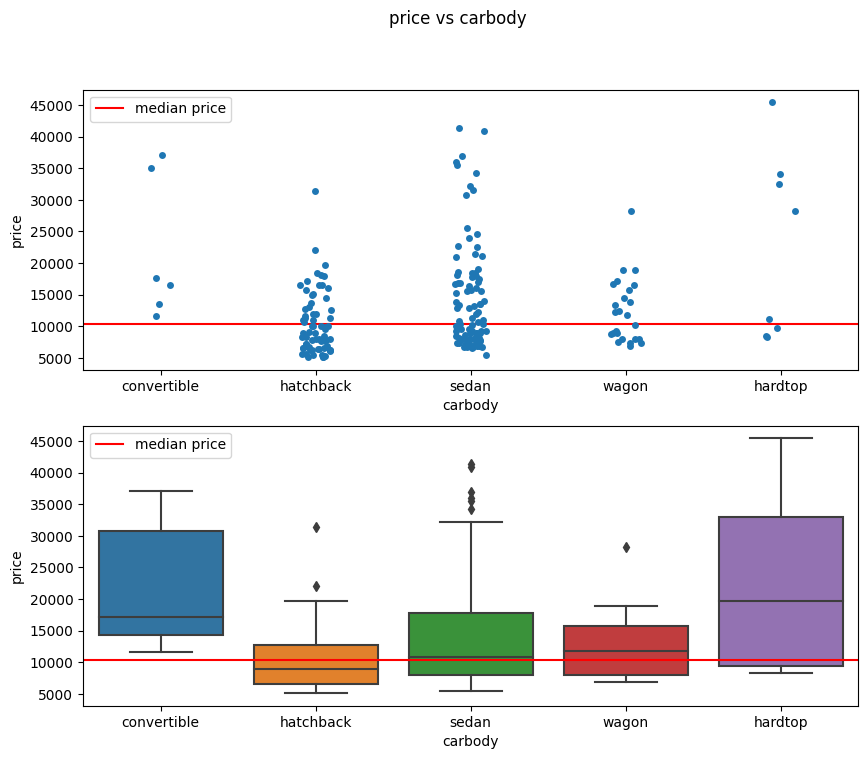

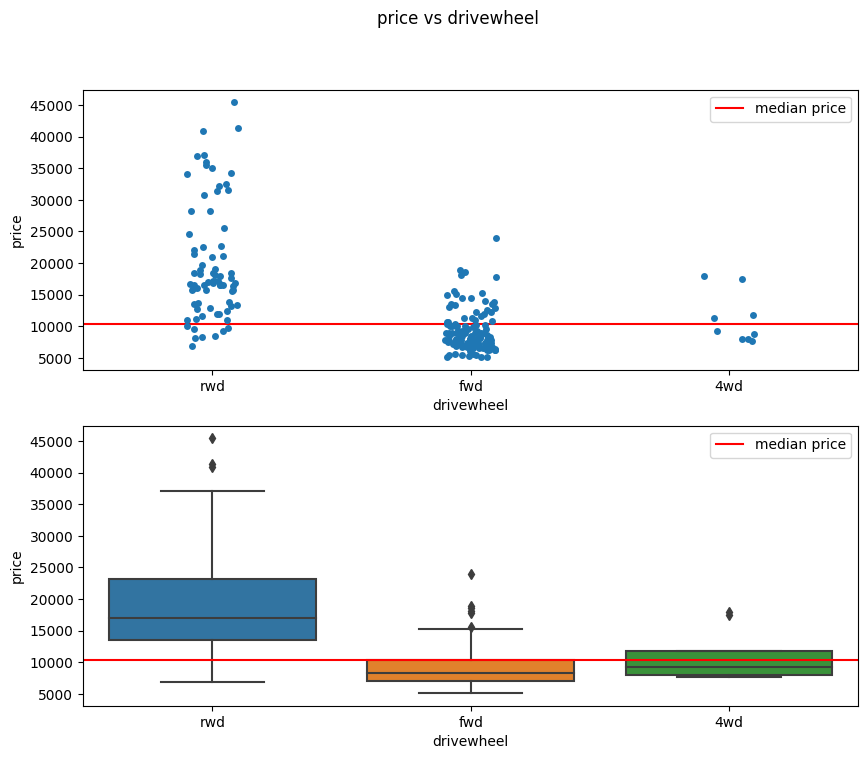

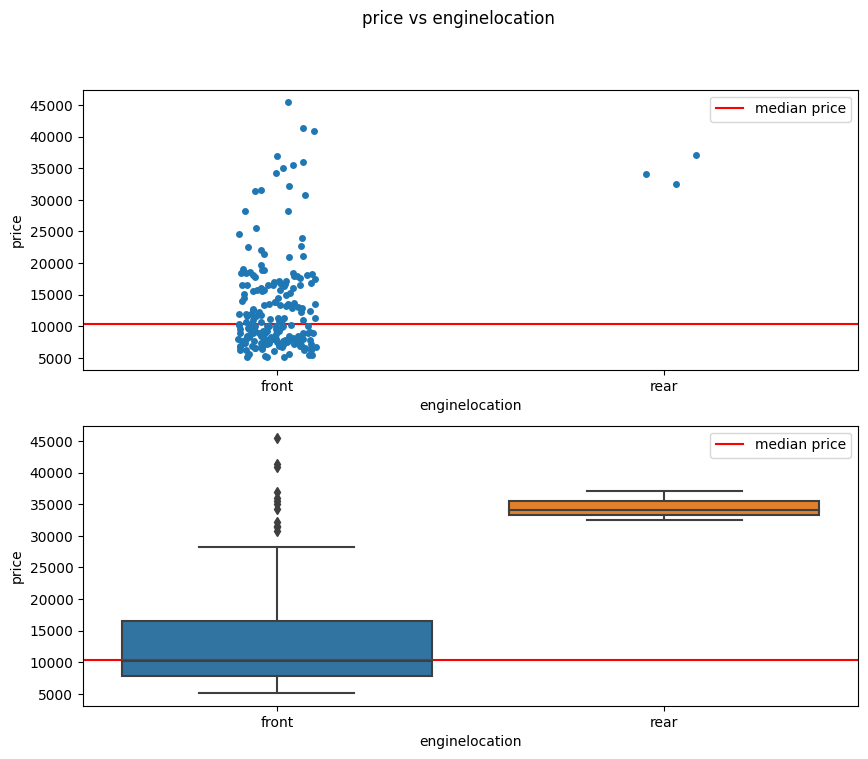

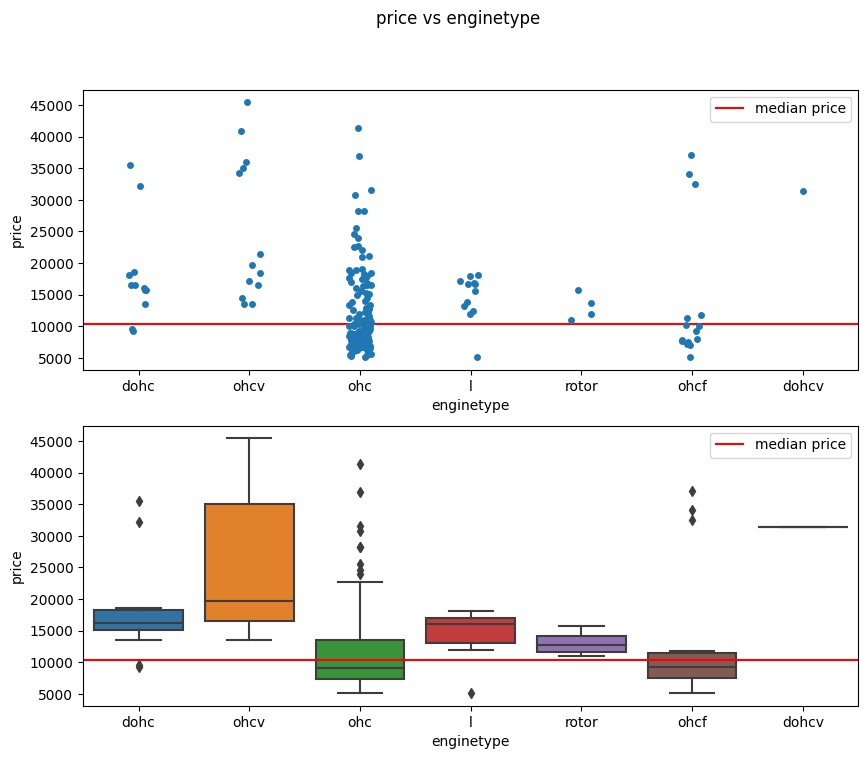

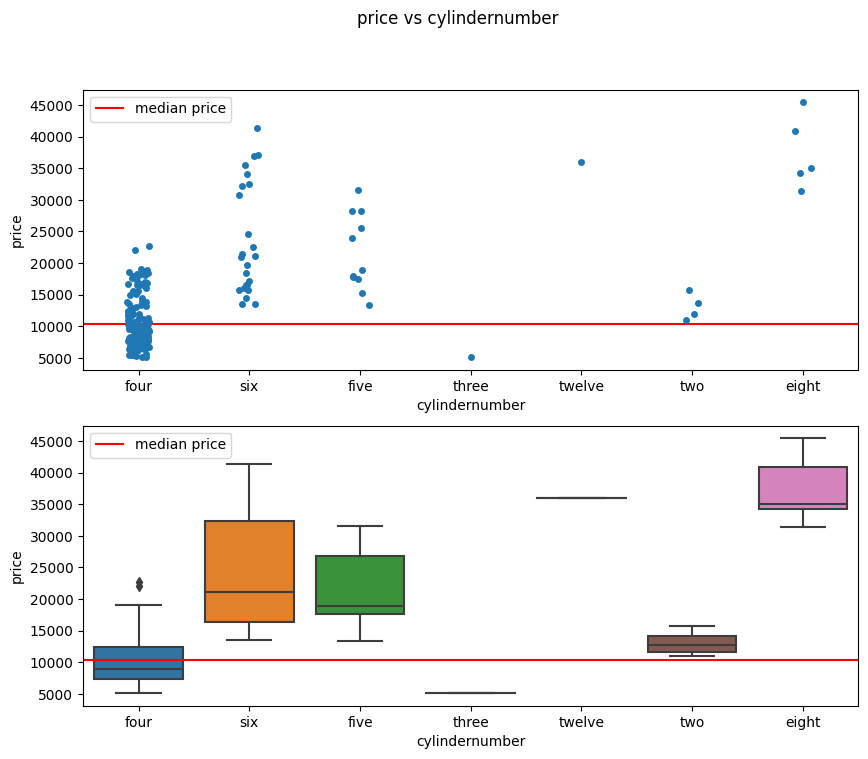

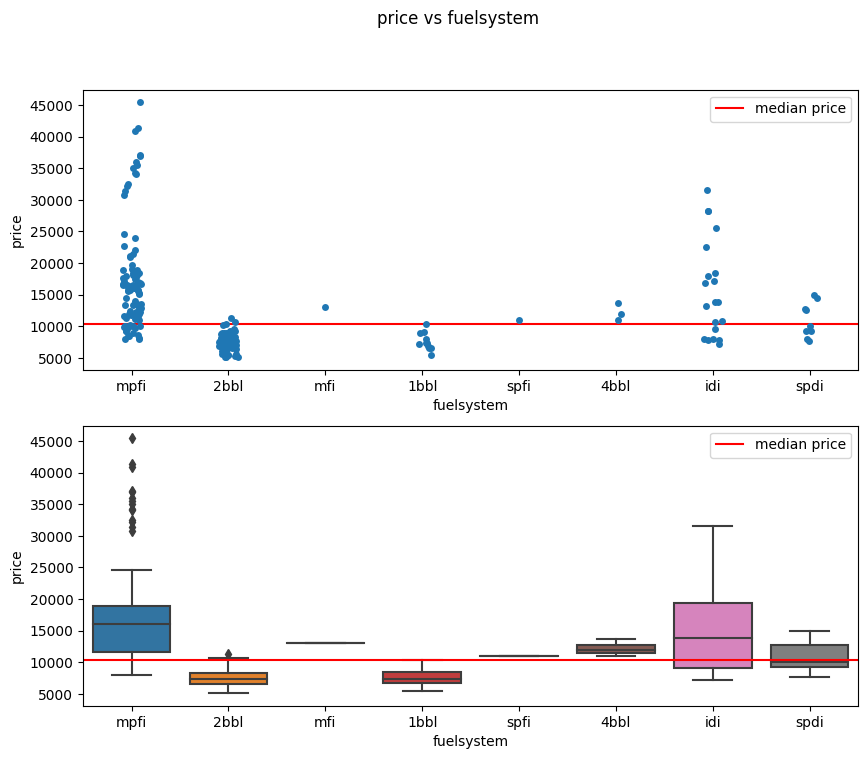

In [42]:
def plot_cat_and_box(df1, cat, y_name, hline_value, lbl_hline):

    fig, ax = plt.subplots(2,1, figsize=(10,8))
    
    sns.stripplot(ax=ax[0], data=df1, x=cat, y=y_name)
    ax[0].axhline(y = hline_value, color = 'r', linestyle = '-', label=lbl_hline)
    ax[0].legend()
   
    sns.boxplot(ax=ax[1], data=df1, x=cat, y=y_name)
    ax[1].axhline(y = hline_value, color = 'r', linestyle = '-', label=lbl_hline)
    plt.suptitle(y_name+" vs "+cat)
    
    ax[1].legend()

for k in cat_dict.keys():
    plot_cat_and_box(df, k, "price",median_price, "median price")

---
### De los gráficos anteriores, podemos ver que los datos categoricos mas relacionados con
### una separacion caro/barato son fueltype, aspiration, cylindernumber, fuelsystem, carbody, driveweel, enginetype


---

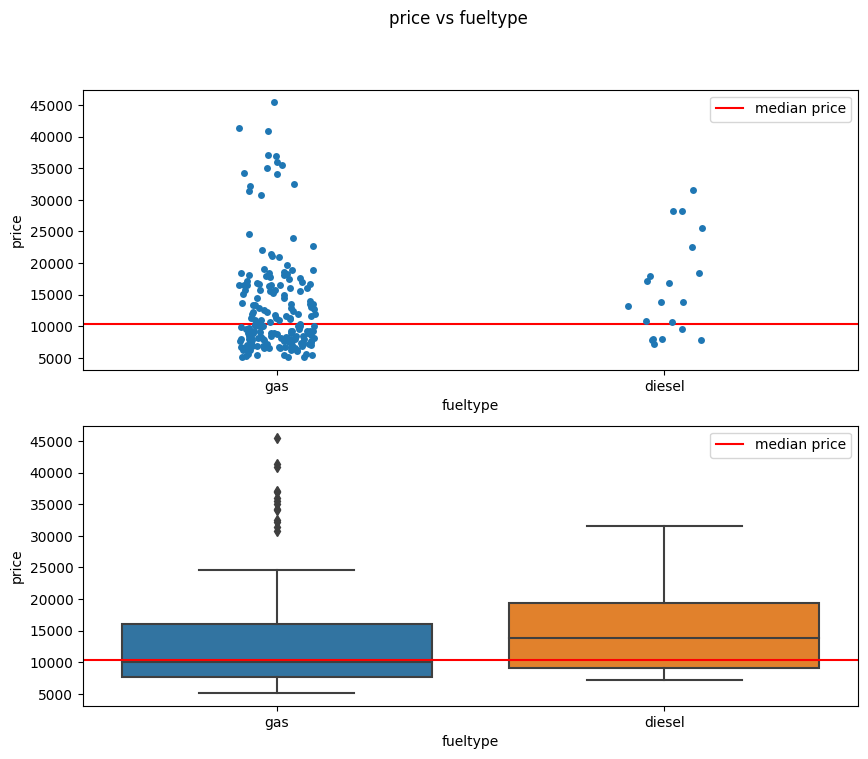

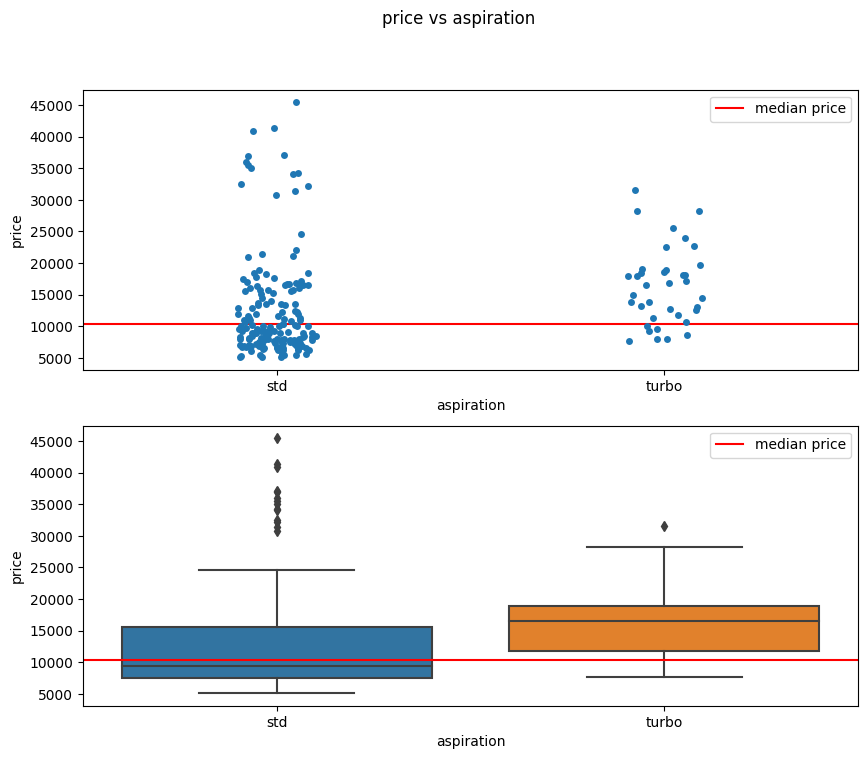

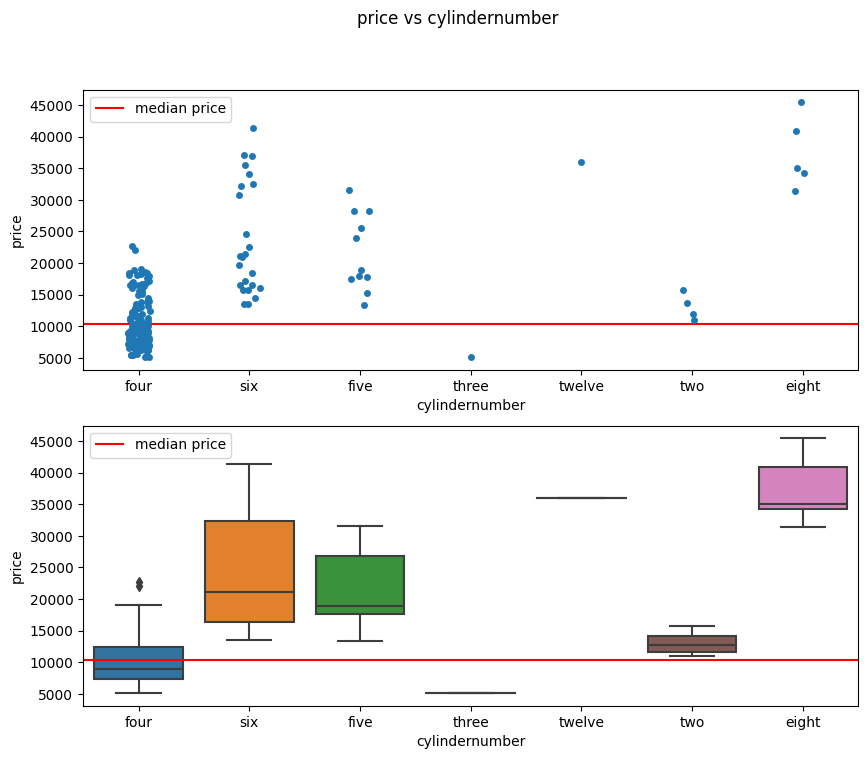

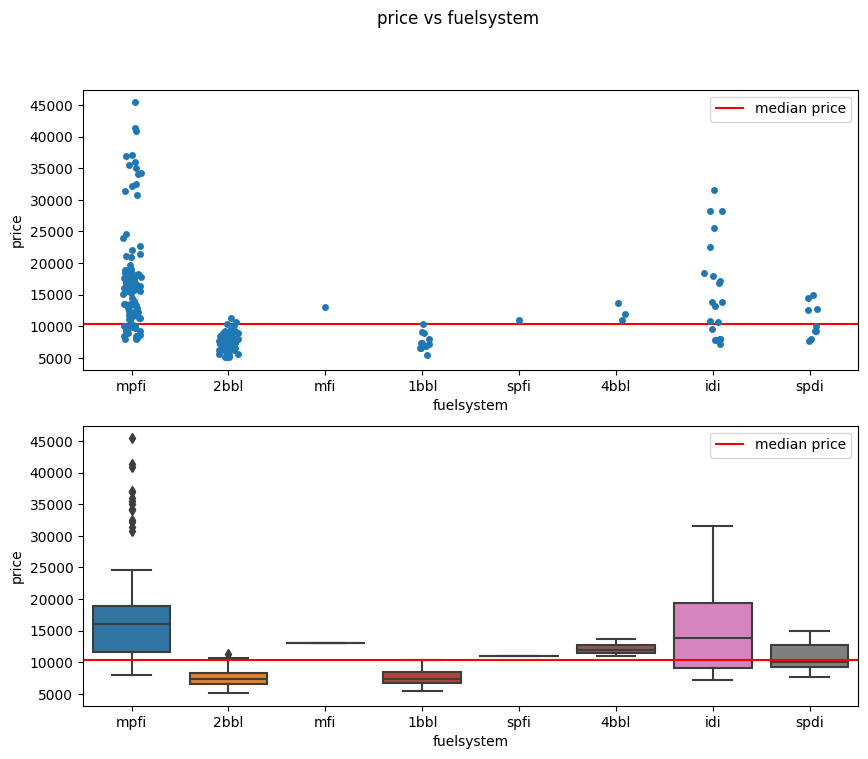

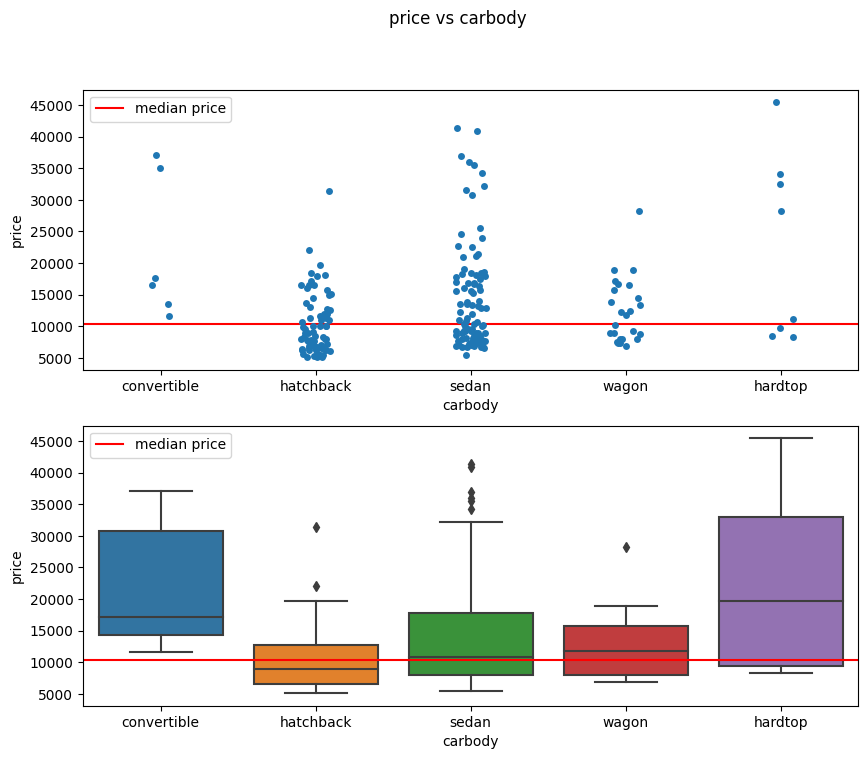

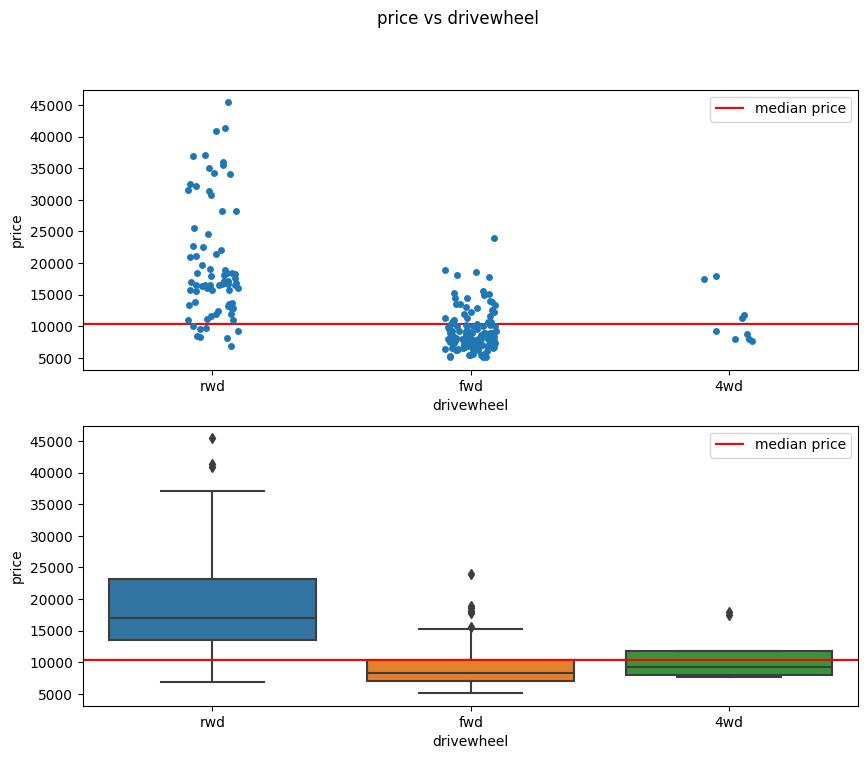

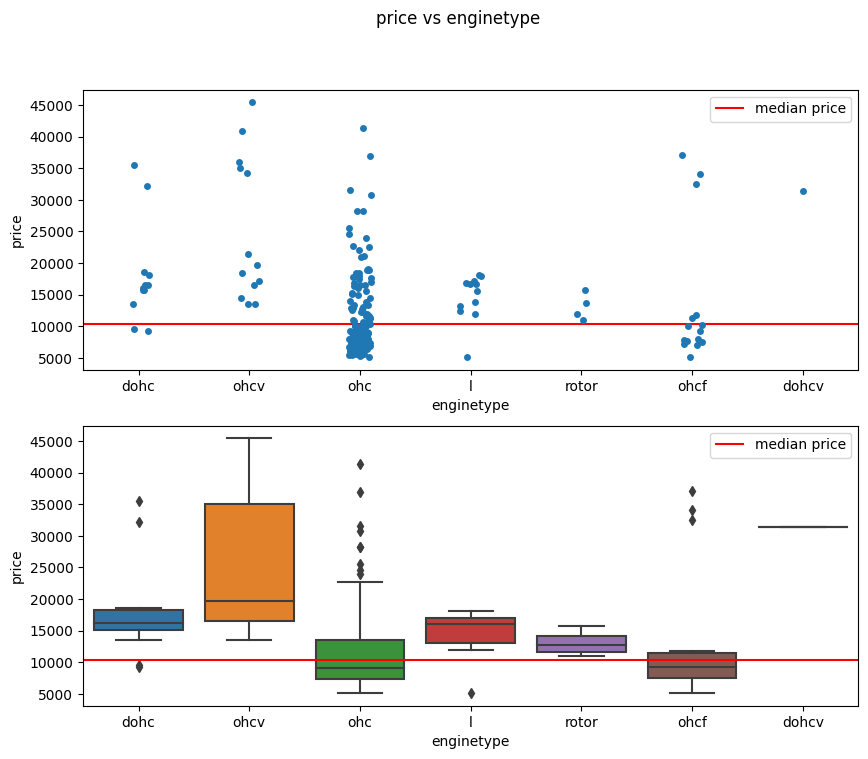

In [45]:
selected_categories = ['fueltype','aspiration','cylindernumber','fuelsystem','carbody','drivewheel','enginetype']

for c in selected_categories:
    plot_cat_and_box(df, c, "price",median_price, "median price")   

---
### Vuelvo a hacer otra seleccion, de los pre-seleccionados (en función de cantidad de ocurrencias o densidad en cada grupo)

enginetype, driveweel, fuelsystem, cylindernumber

---

In [69]:
cat_selected = ['enginetype', 'drivewheel', 'fuelsystem', 'cylindernumber']


---
## Ahora vamos con los datos no categoricos

---

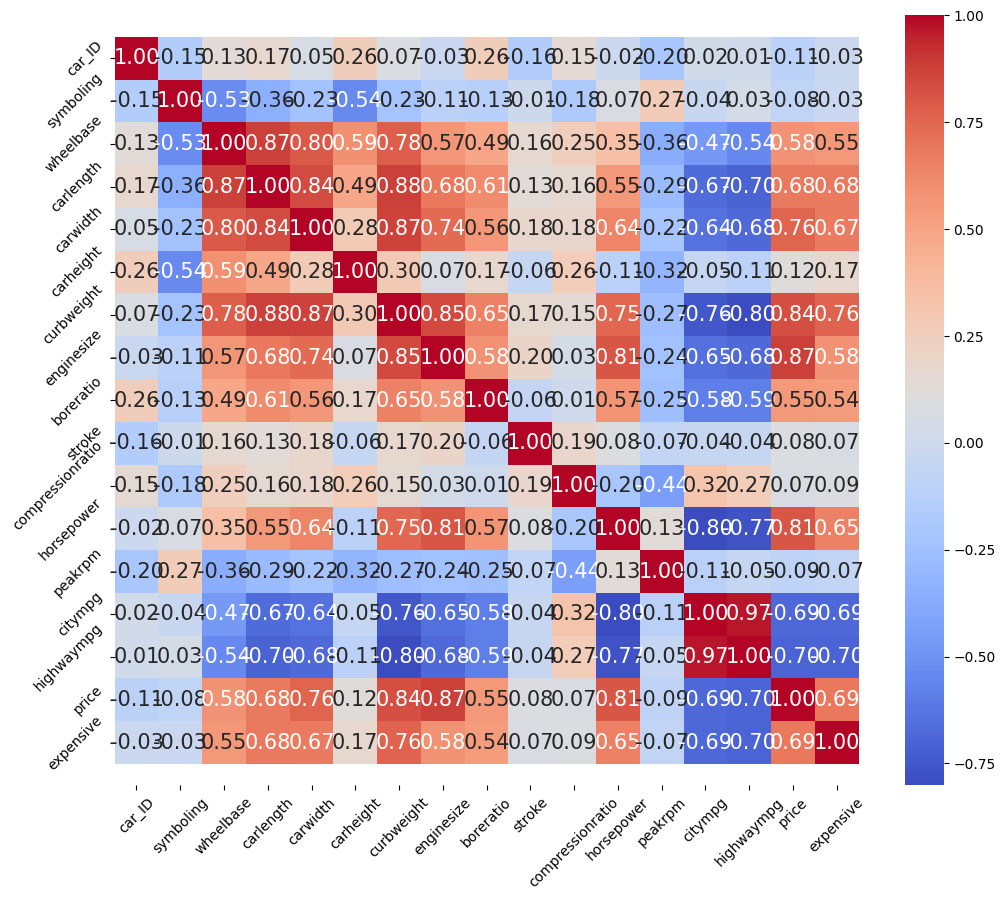

In [54]:
corr = df.corr()

def plot_heatmap(corr):
    '''
    Función para graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

plot_heatmap(corr)

---
### Hay demasiados datos en la correlacion -->vamos a inspeccionarlos de otra manera primero

---

In [61]:
corr_price = corr["price"].map(lambda x: abs(x))

# No se ve demasiado, vamos a obtener las correlaciones con price
corr_price.sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
expensive           0.687362
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

---
### Ploteo los 5 mas correlacionados con price

---

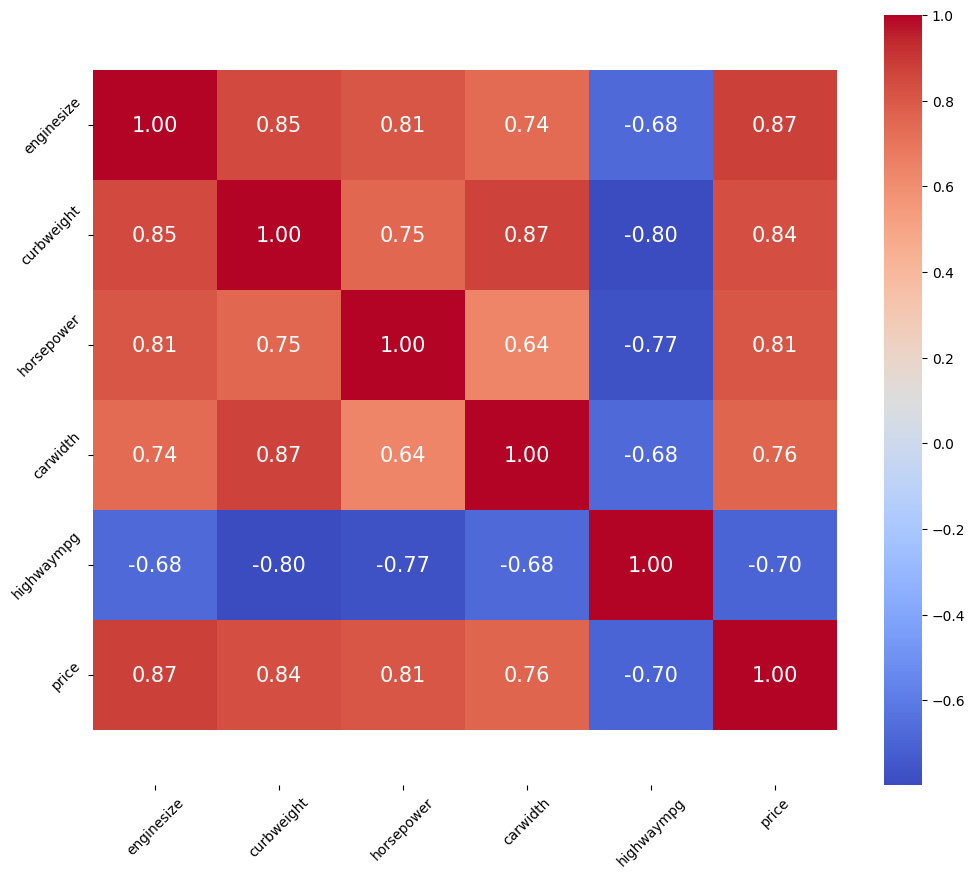

In [62]:
corr_selected = ['enginesize', 'curbweight', 'horsepower', 'carwidth','highwaympg', 'price']

corr2 = df[corr_selected].corr()

plot_heatmap(corr2)

---

### Me quedo con las 3 mas correlacionadas

---

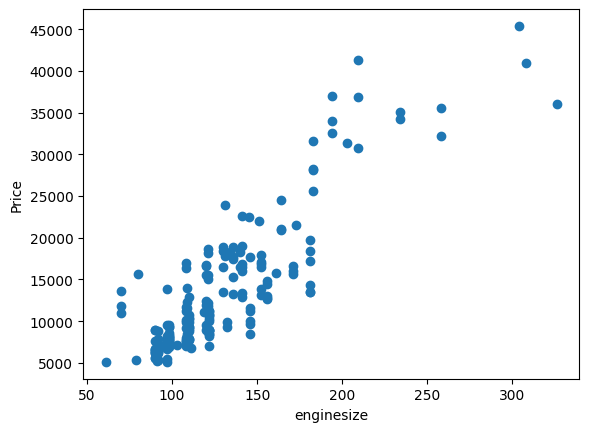

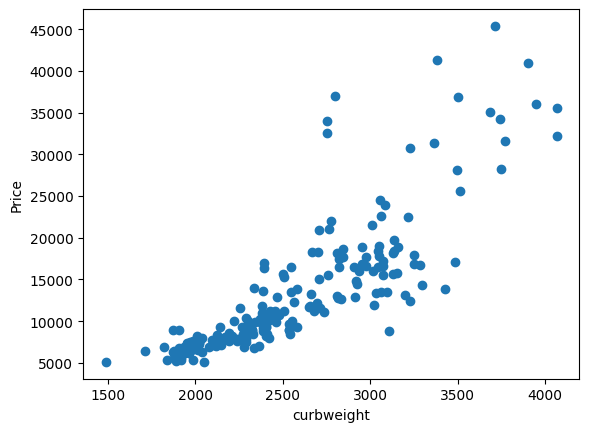

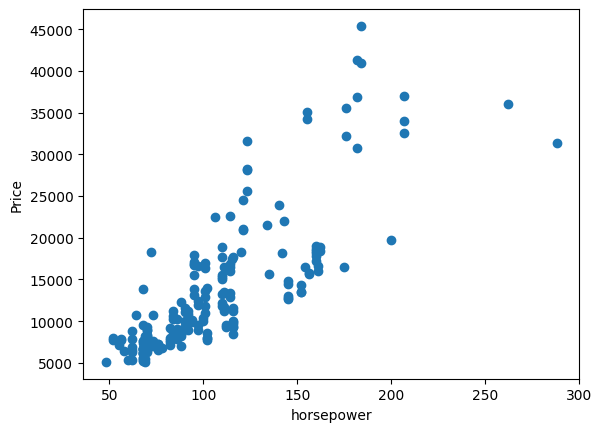

In [76]:
num_selected = ['enginesize', 'curbweight', 'horsepower']

for n in num_selected:
    fig, ax = plt.subplots()
    ax.scatter(df[n], df['price'])
    ax.set(xlabel=n, ylabel='Price')

---
# Modelos

---

In [83]:
X = df.copy()

num_and_cat_selected = num_selected.copy()
num_and_cat_selected.extend(cat_selected)
# Vamos a trabajar con algunas columas numericas y algunas categoricas
X = X[num_and_cat_selected]


['enginetype', 'drivewheel', 'fuelsystem', 'cylindernumber']

In [85]:
selected_keys = {}
for c in cat_selected:
    selected_keys[c] = X[c].unique().tolist()

selected_keys

# Vamos a hacer un encoding sparse (no one hot)


encoded_keys = {
    'enginetype': {'dohc':1, 'ohcv':2, 'ohc':3, 'l':4, 'rotor':5, 'ohcf':6, 'dohcv':7},
    'drivewheel': {'rwd':1, 'fwd':2, '4wd':3},
    'fuelsystem': {'mpfi':1, '2bbl':2, 'mfi':3, '1bbl':4, 'spfi':5, '4bbl':6, 'idi':7, 'spdi':8},
    'cylindernumber': {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}
}

for k,v in encoded_keys.items():
    X[k] = X[k].map(v)

X.head()

,enginesize,curbweight,horsepower,enginetype,drivewheel,fuelsystem,cylindernumber
0,130,2548,111,1,1,1,4
1,130,2548,111,1,1,1,4
2,152,2823,154,2,1,1,6
3,109,2337,102,3,2,1,4
4,136,2824,115,3,3,1,5


In [162]:
y_reg = df["price"].to_numpy()
y_class = df["expensive"].to_numpy()

X_reg = X[num_selected]
x_pred_only_cat = X[cat_selected]


x_pred_cat_and_num = X.copy()


In [158]:
# X para regression
X_reg.head()

,enginesize,curbweight,horsepower
0,130,2548,111
1,130,2548,111
2,152,2823,154
3,109,2337,102
4,136,2824,115


In [159]:
# X para clasiffication, opcion 1 --> solo datos categoricos
x_pred_only_cat.head()

,enginetype,drivewheel,fuelsystem,cylindernumber
0,1,1,1,4
1,1,1,1,4
2,2,1,1,6
3,3,2,1,4
4,3,3,1,5


In [160]:
# X para clasificacion, opcion 2 --> datos numericos y categoricos
x_pred_cat_and_num.head()

,enginesize,curbweight,horsepower,enginetype,drivewheel,fuelsystem,cylindernumber
0,130,2548,111,1,1,1,4
1,130,2548,111,1,1,1,4
2,152,2823,154,2,1,1,6
3,109,2337,102,3,2,1,4
4,136,2824,115,3,3,1,5


---
### Prediccion del precio --> regresion

---

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_reg = pd.DataFrame(scaler.fit_transform(X_reg), columns=X_reg.columns.tolist())
X_reg

# scaler = MinMaxScaler()

# X_reg=pd.DataFrame(scaler.fit_transform(X_reg.T).T,columns=X_reg.columns)
# X_reg.head()

,enginesize,curbweight,horsepower
0,0.260377,0.411171,0.262500
1,0.260377,0.411171,0.262500
2,0.343396,0.517843,0.441667
3,0.181132,0.329325,0.225000
4,0.283019,0.518231,0.279167
...,...,...,...
200,0.301887,0.567882,0.275000
201,0.301887,0.605508,0.466667
202,0.422642,0.591156,0.358333
203,0.316981,0.670675,0.241667


In [164]:
from sklearn.model_selection import train_test_split

X_reg_np = X_reg.to_numpy()
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_np, y_reg, test_size=0.30, random_state=42) # Separamos nuestros datos

In [165]:
from sklearn.linear_model import LinearRegression 

# Primero creamos el modelo "vacio"
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Ajustamos el modelo a nuestros datos
model1.fit(X_reg_train[:,0].reshape(-1,1),y_reg_train)
model2.fit(X_reg_train[:,1].reshape(-1,1),y_reg_train)
model3.fit(X_reg_train[:,2].reshape(-1,1),y_reg_train)
model4.fit(X_reg_train,y_reg_train)

# pendiente1 = model1.coef_
# ordenada1 = model1.intercept_
# print(f'La pendiente obtenida con Sklearn es : {model1.coef_}')
# print(f'La ordenada al origen obtenida con Sklearn es: {model1.intercept_}')

LinearRegression()

In [166]:
# Predicciones

pred_test1 = model1.predict(X_reg_test[:,0].reshape(-1,1))
pred_train1 = model1.predict(X_reg_train[:,0].reshape(-1,1))

pred_test2 = model2.predict(X_reg_test[:,1].reshape(-1,1))
pred_train2 = model2.predict(X_reg_train[:,1].reshape(-1,1))

pred_test3 = model3.predict(X_reg_test[:,2].reshape(-1,1))
pred_train3 = model3.predict(X_reg_train[:,2].reshape(-1,1))

pred_test4 = model4.predict(X_reg_test)
pred_train4 = model4.predict(X_reg_train)

In [167]:
from sklearn.metrics import mean_squared_error as mse

# Raiz del Error cuadratico medio en la predicción del conjunto de train, primer feature

rmse_train1 = mse(y_reg_train, pred_train1, squared=False)
rmse_test1 = mse(y_reg_test, pred_test1, squared=False)

rmse_train2 = mse(y_reg_train, pred_train2, squared=False)
rmse_test2 = mse(y_reg_test, pred_test2, squared=False)

rmse_train3 = mse(y_reg_train, pred_train3, squared=False)
rmse_test3 = mse(y_reg_test, pred_test3, squared=False)

rmse_train4 = mse(y_reg_train, pred_train4, squared=False)
rmse_test4 = mse(y_reg_test, pred_test4, squared=False)

print("rmse (train) --> ", rmse_train1)
print("rmse (test) --> ", rmse_test1)

rmse (train) -->  3754.7408323331874
rmse (test) -->  4132.707975899923


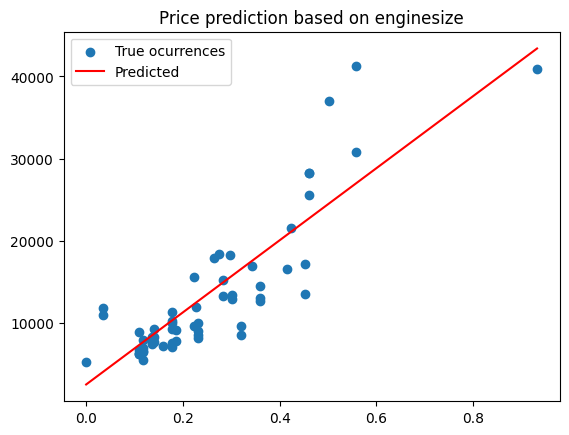

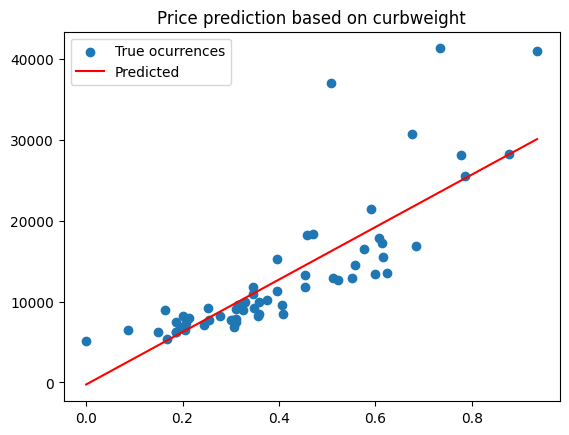

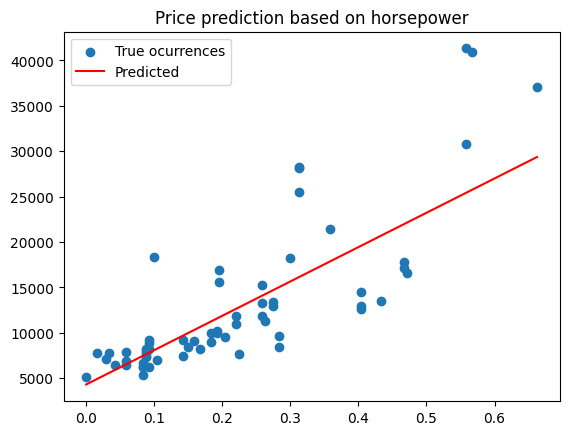

In [168]:


m, M = X_reg_test[:,0].min(), X_reg_test[:,0].max(axis=0)
pred = model1.predict([[m],[M]])
plt.scatter(X_reg_test[:,0], y_reg_test, label="True ocurrences")
plt.plot([m, M], pred, 'r', label="Predicted")
plt.legend()
plt.title("Price prediction based on enginesize")
plt.show()

m, M = X_reg_test[:,1].min(), X_reg_test[:,1].max(axis=0)
pred = model2.predict([[m],[M]])
plt.scatter(X_reg_test[:,1], y_reg_test, label="True ocurrences")
plt.plot([m, M], pred, 'r', label="Predicted")
plt.legend()
plt.title("Price prediction based on curbweight")
plt.show()
	

m, M = X_reg_test[:,2].min(), X_reg_test[:,2].max(axis=0)
pred = model3.predict([[m],[M]])
plt.scatter(X_reg_test[:,2], y_reg_test, label="True ocurrences")
plt.plot([m, M], pred, 'r', label="Predicted")
plt.legend()
plt.title("Price prediction based on horsepower")
plt.show()





---
## Clasificacion en caro-barato

---

In [169]:
x_pred_only_cat.head()

,enginetype,drivewheel,fuelsystem,cylindernumber
0,1,1,1,4
1,1,1,1,4
2,2,1,1,6
3,3,2,1,4
4,3,3,1,5


In [170]:
x_pred_cat_and_num.head()

,enginesize,curbweight,horsepower,enginetype,drivewheel,fuelsystem,cylindernumber
0,130,2548,111,1,1,1,4
1,130,2548,111,1,1,1,4
2,152,2823,154,2,1,1,6
3,109,2337,102,3,2,1,4
4,136,2824,115,3,3,1,5


In [171]:
scaler = MinMaxScaler()
# aux = x_pred_cat_and_num.copy()
x_pred_cat_and_num[['enginesize','curbweight','horsepower']] = scaler.fit_transform(x_pred_cat_and_num[['enginesize','curbweight','horsepower']])

x_pred_cat_and_num.head()

,enginesize,curbweight,horsepower,enginetype,drivewheel,fuelsystem,cylindernumber
0,0.260377,0.411171,0.262500,1,1,1,4
1,0.260377,0.411171,0.262500,1,1,1,4
2,0.343396,0.517843,0.441667,2,1,1,6
3,0.181132,0.329325,0.225000,3,2,1,4
4,0.283019,0.518231,0.279167,3,3,1,5


---
### Vamos a armar un modelo cualquiera para clasificar nuestros datos

- Decision Tree

---

In [172]:
# Train test split
from sklearn.model_selection import train_test_split

x_pred_cat_num_np =x_pred_cat_and_num.to_numpy()
x_pred_only_cat_np = x_pred_only_cat.to_numpy()
X_pred_cat_train, X_pred_cat_test, y_pred_cat_train, y_pred_cat_test = train_test_split(x_pred_only_cat_np, y_class, test_size=0.30, random_state=42) # Separamos nuestros datos
X_pred_cat_num_train, X_pred_cat_num_test, y_pred_cat_num_train, y_pred_cat_num_test = train_test_split(x_pred_cat_num_np, y_class, test_size=0.30, random_state=42) # Separamos nuestros datos

In [182]:
# Decision Trees
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


model_dt_cat = DecisionTreeClassifier(random_state=0, max_depth=5)
model_dt_cat_num = DecisionTreeClassifier(random_state=0, max_depth=5)

res1 = cross_val_score(model_dt_cat, X_pred_cat_train, y_pred_cat_train, cv=10)
res2 = cross_val_score(model_dt_cat_num, X_pred_cat_num_train, y_pred_cat_num_train, cv=10)

print(res1.mean())
print(res2.mean())


0.7828571428571428
0.8795238095238096


---
### Modelo solo utilizando datos categoricos

---

In [183]:
from sklearn.metrics import accuracy_score

model_dt_cat.fit(X_pred_cat_train, y_pred_cat_train)

pred_test_cat = model_dt_cat.predict(X_pred_cat_test)
pred_train_cat = model_dt_cat.predict(X_pred_cat_train)



print("acc entrenando con datos categoricos (test)",accuracy_score(pred_test_cat, y_pred_cat_test))
print("acc entrenando con datos categoricos (train)",accuracy_score(pred_train_cat, y_pred_cat_train))

acc entrenando con datos categoricos (test) 0.9032258064516129
acc entrenando con datos categoricos (train) 0.8601398601398601


---
### Modelo utilizando datos numericos y categoricos

---

In [184]:
model_dt_cat_num.fit(X_pred_cat_num_train, y_pred_cat_num_train)

pred_test_cat_num = model_dt_cat_num.predict(X_pred_cat_num_test)
pred_train_cat_num = model_dt_cat_num.predict(X_pred_cat_num_train)



print("acc entrenando con datos categoricos y numéricos (test) --> ",accuracy_score(pred_test_cat_num, y_pred_cat_num_test))
print("acc entrenando con datos categoricos y numéricos (train) --> ",accuracy_score(pred_train_cat_num, y_pred_cat_num_train))

acc entrenando con datos categoricos y numéricos (test) -->  0.9354838709677419
acc entrenando con datos categoricos y numéricos (train) -->  0.9790209790209791
